In [1]:
#Importing libraries

In [2]:
##################

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator
#import tensorflow as tf

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
from cv2 import cv2                  
#import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


##################

In [3]:
#Data Preprocessing

In [4]:
#Training Image processing

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set=train_datagen.flow_from_directory(
        'training_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical')

Found 2324 images belonging to 3 classes.


In [6]:
#Test imagen processing

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'test_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical')

Found 1502 images belonging to 3 classes.


In [8]:
# Building Model, Now we will create the architecture of our neural network

In [9]:
# First we create an empty Sequential model. 

In [10]:
# This model means that we will create a series of sequential layers of neurons, "one in front of the other".

In [11]:
cnn=tf.keras.models.Sequential() 
# The Sequential class:
# Sequential groups a linear stack of layers into a tf.keras.Model.

In [12]:
#Building Convolution Layer

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
# 2D convolution layer:This layer creates a convolution kernel that is convolved,
# with the layer input to produce a tensor of outputs.
# Arguments:
# filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
# kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. 
# Can be a single integer to specify the same value for all spatial dimensions.
# activation: Activation function to use. 
# Relu: Applies the rectified linear unit activation function.
# input_shape: When using this layer as the first layer in a model, provide the keyword argument input_shape 
# (tuple of integers or None, does not include the sample axis), e.g. input_shape=(64, 64, 3) 
# for 64x64 RGB pictures in data_format="channels_last". 

In [14]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# Max pooling operation for 2D spatial data:
# Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window,
# (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.5))
# Dropout class:
# Applies Dropout to the input.The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during 
# training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) 
# such that the sum over all inputs is unchanged.

In [17]:
cnn.add(tf.keras.layers.Flatten()) 
# Flatten class: Flattens the input. Does not affect the batch size.
# Note: If inputs are shaped (batch,) without a feature axis, then flattening adds an extra channel 
# dimension and output shape is (batch, 1).

In [18]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu')) 
# Layer activation functions
# Relu: Applies the rectified linear unit activation function.

In [19]:
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))
# Layer activation functions
# Arguments:
# softmax: Softmax converts a vector of values to a probability distribution.

In [20]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
# Compilation: Before training a model, you need to configure the learning process, 
# which is done via the compile method. It receives three arguments:
# an optimizer. This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), 
    # or an instance of the Optimizer class.
# RMSProp optimizer. It is recommended to leave the parameters of this optimizer at their default values 
# (except the learning rate, which can be freely tuned).
# a loss function. This is the objective that the model will try to minimize. It can be the string identifier of an 
    # existing loss function (such as categorical_crossentropy or mse), or it can be an objective function.
# categorical_crossentropy: Also known as multiclass logloss.
# a list of metrics. For any classification problem you will want to set this to metrics=['accuracy']. 
    # A metric could be the string identifier of an existing metric (only accuracy is supported at this point), 
    # or a custom metric function.

In [21]:
#Summary

In [22]:
cnn.summary() #Prints a string summary of the network.
# Call model.summary() to print a useful summary of the model, including:
# Name and type of all layers in the model.
# Output shape for each layer.
# Number of weight parameters for each layer.
# If the model has general topology (discussed below), the inputs that each layer receives.
# The total number of trainable and untrainable parameters of the model.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0

In [23]:
# Training & evaluation with the built-in methods

In [24]:
History = cnn.fit(x=training_set,validation_data=test_set,epochs=60)
# Class weights
# This is set by passing a dictionary to the class_weight argument to Model.fit(). 
    # This dictionary maps class indices to the weight # that should be used for samples belonging to this class.
# This can be used to balance classes without resampling, or to train a model that gives more importance to a particular class.

# Arguments: 

Epoch 1/60
73/73 [==============================] - 41s 545ms/step - loss: 1.1081 - accuracy: 0.4677 - val_loss: 1.0233 - val_accuracy: 0.5453
Epoch 2/60
73/73 [==============================] - 39s 533ms/step - loss: 0.9130 - accuracy: 0.5835 - val_loss: 0.7186 - val_accuracy: 0.6884
Epoch 3/60
73/73 [==============================] - 39s 536ms/step - loss: 0.8419 - accuracy: 0.6213 - val_loss: 0.7130 - val_accuracy: 0.6911
Epoch 4/60
73/73 [==============================] - 39s 536ms/step - loss: 0.8038 - accuracy: 0.6416 - val_loss: 0.6170 - val_accuracy: 0.7490
Epoch 5/60
73/73 [==============================] - 39s 537ms/step - loss: 0.7820 - accuracy: 0.6506 - val_loss: 0.6160 - val_accuracy: 0.7430
Epoch 6/60
73/73 [==============================] - 43s 591ms/step - loss: 0.7300 - accuracy: 0.6751 - val_loss: 0.5572 - val_accuracy: 0.7716
Epoch 7/60
73/73 [==============================] - 39s 533ms/step - loss: 0.7127 - accuracy: 0.6941 - val_loss: 0.5705 - val_accuracy: 0.7643

Epoch 58/60
73/73 [==============================] - 40s 542ms/step - loss: 0.2000 - accuracy: 0.9281 - val_loss: 0.1400 - val_accuracy: 0.9527
Epoch 59/60
73/73 [==============================] - 42s 572ms/step - loss: 0.2060 - accuracy: 0.9243 - val_loss: 0.2280 - val_accuracy: 0.9301
Epoch 60/60
73/73 [==============================] - 39s 537ms/step - loss: 0.2126 - accuracy: 0.9286 - val_loss: 0.1450 - val_accuracy: 0.9554


In [26]:
#Evaluating the Model Performance

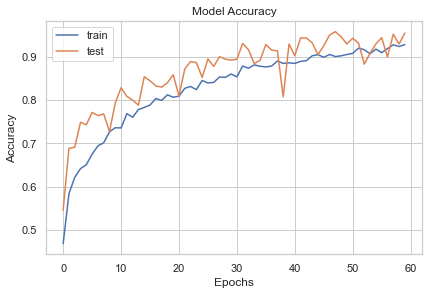

In [27]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [28]:
# The plots are provided below. The history for the validation dataset is labeled test by convention 
# as it is indeed a test dataset for the model.

# From the plot of accuracy we can see that the model could probably be trained a 
# little more as the trend for accuracy on both datasets is still rising for the last few epochs. 
# We can also see that the model has not yet over-learned the training dataset, 
# showing comparable skill on both datasets.

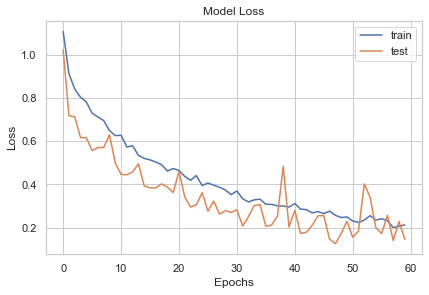

In [29]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [30]:
# From the plot of loss, we can see that the model has comparable performance 
# on both train and validation datasets (labeled test). 
# If these parallel plots start to depart consistently, 
# it might be a sign to stop training at an earlier epoch.

In [45]:
#Preprocess New Image

In [51]:
from keras.preprocessing import image
test_image = image.load_img('Prediction/Search_and_Rescue.jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = cnn.predict(test_image)

In [52]:
# Keras Preprocessing is the data preprocessing and data augmentation module of the Keras deep learning library. 
# It provides utilities for working with image data, text data, and sequence data.

In [53]:
training_set.class_indices

{'Emergency_Vehicles': 0, 'cars': 1, 'suv': 2}

In [54]:
if result[0][0]==1:
    print('Vehicles_Emergency')
elif result[0][1]==1:
    print('Car')
elif result[0][2]==1:
    print('Suv')

Vehicles_Emergency


In [55]:
print(result)

[[1. 0. 0.]]
